<a href="https://colab.research.google.com/github/Dih08/Sistema_dio/blob/main/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baixar o Arquivo: O comando wget irá salvar o arquivo kagglecatsanddogs_5340.zip no diretório atual.

Descompactar o Arquivo: Após baixar o arquivo ZIP, é necessário descompactá-lo para acessar o conteúdo (as imagens). Para isso, use o seguinte comando:

In [ ]:
! wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-11-24 03:01:32--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.48.252, 2600:1417:3f:69c::317f, 2600:1417:3f:688::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.48.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   230MB/s    in 3.4s    

2024-11-24 03:01:35 (229 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
! unzip kagglecatsanddogs_5340.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/55

Bibliotecas (modulos)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

1. TensorFlow e Keras
tensorflow as tf:
Usado para manipular tensores e criar modelos de deep learning.
tensorflow.keras.models.Sequential:
Cria um modelo sequencial onde as camadas são adicionadas uma após a outra.
tensorflow.keras.layers:
Conv2D: Camada convolucional para extração de características.
MaxPooling2D: Reduz a dimensionalidade das features extraídas.
Flatten: Achata os tensores em um vetor 1D para alimentar as camadas densas.
Dense: Camada totalmente conectada usada no final para classificação.
Dropout: Reduz overfitting ao desativar aleatoriamente neurônios durante o treinamento.
tensorflow.keras.preprocessing.image.ImageDataGenerator:
Gera imagens com aumentação de dados para melhorar a generalização do modelo.
keras.optimizers.Adam:
Algoritmo de otimização usado para ajustar os pesos do modelo.
2. Manipulação de Arquivos e Dados
os:
Para manipular diretórios e caminhos de arquivos.
cv2 (OpenCV):
Para carregar, processar e verificar imagens.
numpy:
Para manipular arrays e executar operações matemáticas.
pandas:
Para manipular dados tabulares em DataFrames.
sklearn.model_selection.train_test_split:
Divide o dataset em conjuntos de treinamento e validação/teste.
3. Visualização
matplotlib.pyplot:
Usado para plotar gráficos e exibir imagens.
4. Geração de Resultados Aleatórios
random:
Para gerar números aleatórios ou embaralhar dados.


In [ ]:
input_path = []
label = []

for class_name in os.listdir('PetImages'):
    if os.path.isdir(os.path.join('PetImages', class_name)):
        for image in os.listdir(os.path.join('PetImages', class_name)):
            image_path = os.path.join('PetImages', class_name, image)
            try:
                img = cv2.imread(image_path)
                if img is None or img.shape[0] == 0 or img.shape[1] == 0:
                    os.remove(image_path)
                    print(f"Imagem {image_path} eliminada.")
                else:
                    if class_name == 'Cat':
                        label.append(0)
                    else:
                        label.append(1)
                    input_path.append(image_path)
            except Exception as e:
                os.remove(image_path)
                print(f"Erro ao ler {image_path}: {e}")

Imagem PetImages/Dog/3136.jpg eliminada.
Imagem PetImages/Dog/5604.jpg eliminada.
Imagem PetImages/Dog/2384.jpg eliminada.
Imagem PetImages/Dog/11702.jpg eliminada.
Imagem PetImages/Dog/11849.jpg eliminada.
Imagem PetImages/Dog/10158.jpg eliminada.
Imagem PetImages/Dog/10401.jpg eliminada.
Imagem PetImages/Dog/10797.jpg eliminada.
Imagem PetImages/Dog/3288.jpg eliminada.
Imagem PetImages/Dog/6238.jpg eliminada.
Imagem PetImages/Dog/5736.jpg eliminada.
Imagem PetImages/Dog/11410.jpg eliminada.
Imagem PetImages/Dog/11853.jpg eliminada.
Imagem PetImages/Dog/10747.jpg eliminada.
Imagem PetImages/Dog/7459.jpg eliminada.
Imagem PetImages/Dog/7112.jpg eliminada.
Imagem PetImages/Dog/2688.jpg eliminada.
Imagem PetImages/Dog/4367.jpg eliminada.
Imagem PetImages/Dog/11675.jpg eliminada.
Imagem PetImages/Dog/7133.jpg eliminada.
Imagem PetImages/Dog/3588.jpg eliminada.
Imagem PetImages/Dog/7369.jpg eliminada.
Imagem PetImages/Dog/1308.jpg eliminada.
Imagem PetImages/Dog/2877.jpg eliminada.
Imagem 

Iteração pelos Diretórios e Arquivos:

Usa os.listdir para iterar pelas subpastas Cat e Dog dentro de PetImages.
Confirma que cada item listado é uma pasta usando os.path.isdir.
Verificação de Imagens:

Tenta carregar cada imagem com cv2.imread.
Verifica se a imagem é válida:
Imagem nula (img is None).
Imagem com dimensões inválidas (img.shape[0] == 0 ou img.shape[1] == 0).
Remoção de Imagens Inválidas:

Imagens inválidas são removidas com os.remove.
O caminho e o rótulo correspondente não são adicionados às listas.
Armazenamento de Imagens Válidas:

Caminhos válidos são armazenados em input_path.
Rótulos correspondentes (0 para gatos e 1 para cães) são armazenados em label.
Tratamento de Exceções:

Se ocorrer qualquer erro durante a leitura da imagem, o arquivo é removido, e uma mensagem de erro é exibida.


In [ ]:
# Criar DataFrame
df = pd.DataFrame({
    'Imagem': input_path,
    'Rotulo': label
})

print(df.head())

                    Imagem  Rotulo
0  PetImages/Dog/10356.jpg       1
1    PetImages/Dog/619.jpg       1
2   PetImages/Dog/8152.jpg       1
3   PetImages/Dog/4600.jpg       1
4   PetImages/Dog/6700.jpg       1


Criação do DataFrame:

A função pd.DataFrame cria um DataFrame a partir de um dicionário, onde as chaves ('Imagem' e 'Rotulo') se tornam os nomes das colunas, e os valores (input_path e label) são os dados associados.
Exibição das Primeiras Linhas:

df.head() exibe as 5 primeiras linhas do DataFrame para verificar como os dados foram carregados.

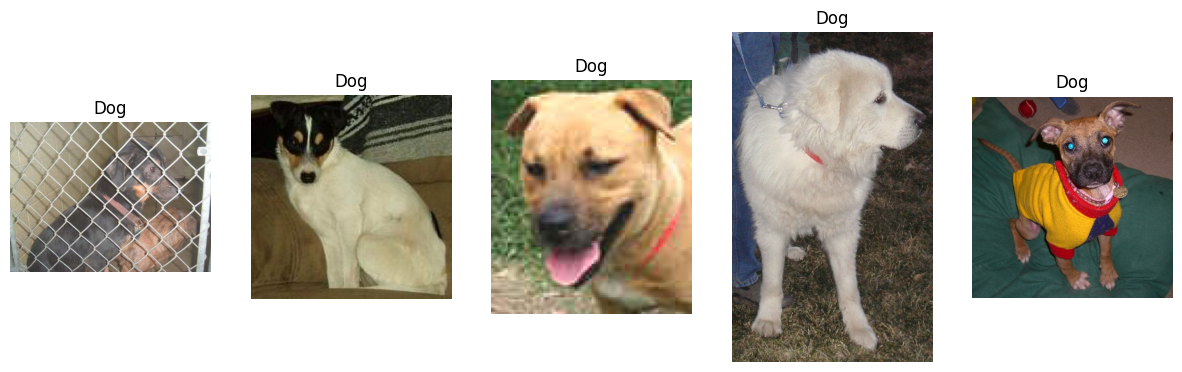

In [ ]:
# Filtrar imagens de cachorros
dog_images = [path for path, lbl in zip(input_path, label) if lbl == 1]

# Função para exibir imagens
def display_dog_images(image_paths, num_images=5):
    plt.figure(figsize=(15, 10))  # Tamanho da figura
    for i in range(min(num_images, len(image_paths))):
        # Carregar imagem usando OpenCV
        img = cv2.imread(image_paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter de BGR para RGB

        # Exibir imagem
        plt.subplot(1, num_images, i + 1)  # Organizar em uma linha com num_images colunas
        plt.imshow(img)
        plt.title("Dog")
        plt.axis('off')
    plt.show()

# Exibir as primeiras 5 imagens de cachorros
display_dog_images(dog_images, num_images=5)

Filtragem de Imagens de Cães:

dog_images contém apenas os caminhos das imagens cujo rótulo é 1 (cães), filtrados usando zip e uma list comprehension.
Função para Exibir Imagens:

A função display_dog_images recebe a lista de caminhos (image_paths) e o número de imagens a serem exibidas (num_images).
Lê cada imagem com cv2.imread, converte o formato de cor de BGR para RGB (para exibição correta no Matplotlib) e exibe as imagens em uma grade.
Exibição:

As primeiras 5 imagens de cães são exibidas com o título "Dog" e sem eixos visíveis.

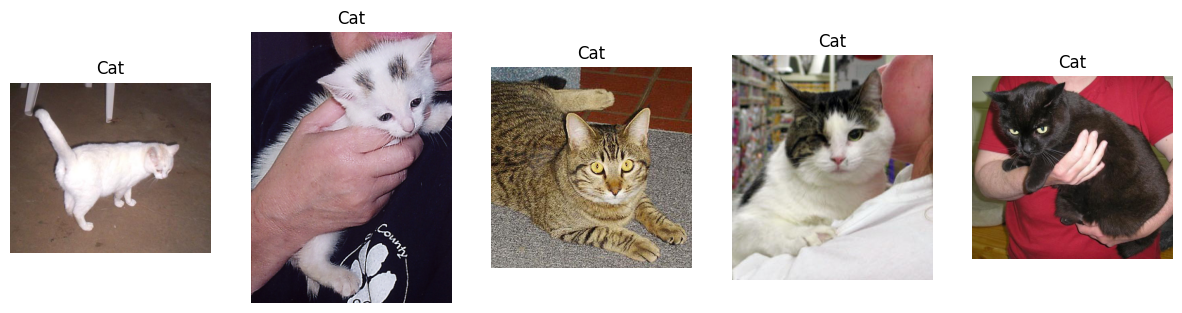

In [ ]:
# Filtrar imagens de gatos
cat_images = [path for path, lbl in zip(input_path, label) if lbl == 0]

# Função para exibir imagens
def display_cat_images(image_paths, num_images=5):
    plt.figure(figsize=(15, 10))  # Tamanho da figura
    for i in range(min(num_images, len(image_paths))):
        # Carregar imagem usando OpenCV
        img = cv2.imread(image_paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter de BGR para RGB

        # Exibir imagem
        plt.subplot(1, num_images, i + 1)  # Organizar em uma linha com num_images colunas
        plt.imshow(img)
        plt.title("Cat")
        plt.axis('off')
    plt.show()

# Exibir as primeiras 5 imagens de gatos
display_cat_images(cat_images, num_images=5)

A mesma coisa só que de gatos

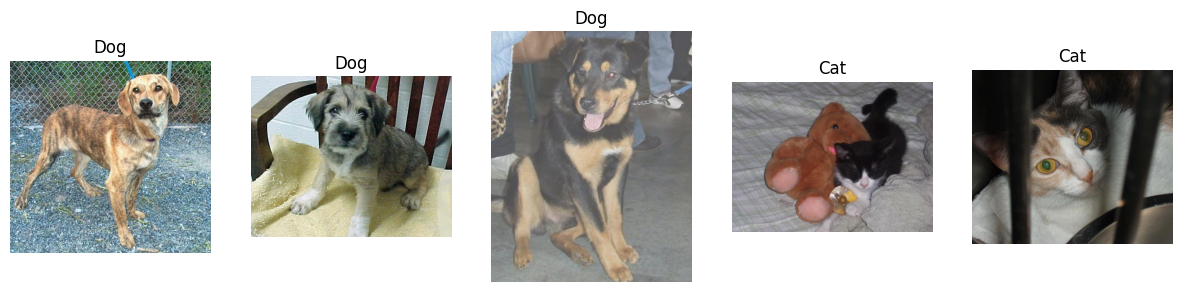

In [ ]:
# Embaralhar imagens e rótulos juntos
data = list(zip(input_path, label))
random.shuffle(data)
shuffled_input_path, shuffled_label = zip(*data)

# Função para exibir imagens embaralhadas
def display_random_images(image_paths, labels, num_images=5):
    plt.figure(figsize=(15, 10))  # Tamanho da figura
    for i in range(min(num_images, len(image_paths))):
        # Carregar imagem usando OpenCV
        img = cv2.imread(image_paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter de BGR para RGB

        # Determinar o título com base no rótulo
        label_name = "Cat" if labels[i] == 0 else "Dog"

        # Exibir imagem
        plt.subplot(1, num_images, i + 1)  # Organizar em uma linha com num_images colunas
        plt.imshow(img)
        plt.title(label_name)
        plt.axis('off')
    plt.show()

# Exibir 5 imagens aleatórias
display_random_images(shuffled_input_path, shuffled_label, num_images=5)

Embaralhar os Dados:

O zip combina as listas input_path e label em pares (caminho, rótulo).
random.shuffle embaralha a lista de pares.
zip(*data) reverte o empacotamento, separando os pares embaralhados novamente em shuffled_input_path e shuffled_label.
Exibição de Imagens Embaralhadas:

A função display_random_images exibe as imagens embaralhadas juntamente com os rótulos correspondentes:
Carrega cada imagem com cv2.imread.
Converte a imagem de BGR para RGB para exibição correta no Matplotlib.
Exibe o título com base no rótulo (Cat para 0 e Dog para 1).
Configuração do Layout:

Exibe até num_images imagens em uma linha, com títulos indicando a classe.

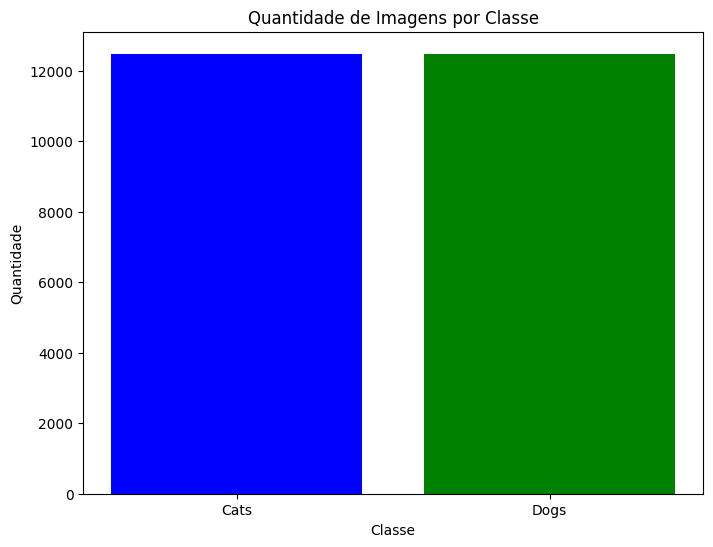

In [ ]:
from collections import Counter
# Contar a quantidade de cada classe
class_counts = Counter(label)
categories = ['Cats', 'Dogs']  # Mapear os rótulos (0 -> Cats, 1 -> Dogs)
counts = [class_counts[0], class_counts[1]]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.title('Quantidade de Imagens por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

Contagem de Classes:

O Counter conta a ocorrência de cada rótulo na lista label:
0 representa gatos.
1 representa cães.
Mapeamento de Rótulos:

Os nomes das categorias ('Cats' e 'Dogs') são atribuídos a uma lista para serem usados como rótulos no gráfico.
Criação do Gráfico:

O plt.bar cria um gráfico de barras para exibir a contagem de cada classe.
As barras são coloridas com ['blue', 'green'] para diferenciar as categorias.
Estilização:

O título ('Quantidade de Imagens por Classe'), os rótulos dos eixos (Classe e Quantidade), e o tamanho da figura são definidos para melhorar a apresentação.


In [ ]:
#Convertendo pra string
df['Imagem'] = df['Imagem'].astype(str)
df['Rotulo'] = df['Rotulo'].astype(str)
df.head()

,Imagem,Rotulo
0,PetImages/Dog/10356.jpg,1
1,PetImages/Dog/619.jpg,1
2,PetImages/Dog/8152.jpg,1
3,PetImages/Dog/4600.jpg,1
4,PetImages/Dog/6700.jpg,1


Conversão para String:

df['Imagem'].astype(str):
Converte os valores da coluna Imagem (caminhos das imagens) para o tipo string, caso ainda não estejam nesse formato.
df['Rotulo'].astype(str):
Converte os rótulos (0 e 1) para strings, útil se você planeja exportar os dados ou trabalhar com métodos que exigem strings.
Exibição do DataFrame:

df.head() exibe as primeiras 5 linhas para verificar se as conversões foram realizadas corretamente.

In [ ]:
# Dividir dados em treinamento e validação
treinamento_caminhos, validacao_caminhos, treinamento_rotulos, validacao_rotulos = train_test_split(df['Imagem'], df['Rotulo'], test_size=0.2, random_state=42)

# Criar geradores de imagens
treinamento_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

validacao_gen = ImageDataGenerator(rescale=1./255)

# Carregar conjuntos de dados
treinamento = treinamento_gen.flow_from_dataframe(df.loc[treinamento_rotulos.index],
                                                x_col='Imagem',
                                                y_col='Rotulo',
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='binary')

validacao = validacao_gen.flow_from_dataframe(df.loc[validacao_rotulos.index],
                                              x_col='Imagem',
                                              y_col='Rotulo',
                                              target_size=(150, 150),
                                              batch_size=32,
                                              class_mode='binary')

Found 19956 validated image filenames belonging to 2 classes.
Found 4990 validated image filenames belonging to 2 classes.


Divisão dos Dados:

df_train conterá 80% das imagens e rótulos.
df_val conterá 20% das imagens e rótulos.
Geradores de Dados:

treinamento: Gerador que aplica aumentação de dados no conjunto de treinamento.
validacao: Gerador que normaliza as imagens do conjunto de validação (sem aumentação).

In [ ]:
# Criar o modelo CNN

modelo = Sequential()

# Camada de convolução 1
modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Camada de pooling 1
modelo.add(MaxPooling2D((2, 2)))

# Camada de convolução 2
modelo.add(Conv2D(64, (3, 3), activation='relu'))

# Camada de pooling 2
modelo.add(MaxPooling2D((2, 2)))

# Camada de convolução 3
modelo.add(Conv2D(128, (3, 3), activation='relu'))

# Camada de pooling 3
modelo.add(MaxPooling2D((2, 2)))

# Camada de flatten
modelo.add(Flatten())

# Camada de densidade 1
modelo.add(Dense(128, activation='relu'))

# Camada de saída
modelo.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Camadas Convolucionais (Conv2D):

Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)):
Primeira camada convolucional com 32 filtros, cada um de tamanho (3, 3), usando a função de ativação ReLU (Rectified Linear Unit). Essa camada extrai características das imagens de entrada com tamanho (150, 150, 3) (150x150 pixels, 3 canais de cor).
Conv2D(64, (3, 3), activation='relu'):
Segunda camada convolucional com 64 filtros, novamente com tamanho (3, 3) e ativação ReLU.
Conv2D(128, (3, 3), activation='relu'):
Terceira camada convolucional com 128 filtros para capturar características mais complexas da imagem.
Camadas de Pooling (MaxPooling2D):

MaxPooling2D((2, 2)):
As camadas de pooling reduzem a dimensionalidade das imagens, mantendo as características mais importantes. O pooling é realizado com uma janela de tamanho (2, 2), o que reduz pela metade as dimensões da imagem em cada direção (largura e altura).
Camada de Flatten:

Flatten():
A camada Flatten achata as saídas das camadas convolucionais e de pooling em um vetor 1D. Isso é necessário para conectar as camadas convolucionais com as camadas densas (totalmente conectadas).
Camada Densa (Fully Co

In [ ]:
# Compilar o modelo
modelo.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

optimizer=Adam(learning_rate=0.001):

Adam: O otimizador Adam (Adaptive Moment Estimation) é amplamente utilizado devido à sua capacidade de ajustar as taxas de aprendizado de forma adaptativa para cada parâmetro, o que torna o treinamento mais eficiente.
learning_rate=0.001: Define a taxa de aprendizado. Este é um valor inicial comum e geralmente funciona bem para a maioria dos problemas. Pode ser ajustado se o modelo não convergir de maneira satisfatória.
loss='binary_crossentropy':

binary_crossentropy: Função de perda usada para classificação binária (duas classes, como "Cachorro" ou "Gato"). Ela calcula a diferença entre as previsões do modelo e os valores reais (rótulos), tentando minimizar essa diferença durante o treinamento.
metrics=['accuracy']:

accuracy: A métrica utilizada para avaliar a performance do modelo durante o treinamento e a validação. Acurácia é a proporção de predições corretas feitas pelo modelo.

In [ ]:
 history = modelo.fit(treinamento, epochs=10, validation_data=validacao, verbose=1)

Epoch 1/10
623/624 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7353 - loss: 0.5252

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 ━━━━━━━━━━━━━━━━━━━━ 150s 238ms/step - accuracy: 0.7354 - loss: 0.5251 - val_accuracy: 0.8026 - val_loss: 0.4305
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 146s 232ms/step - accuracy: 0.7608 - loss: 0.4951 - val_accuracy: 0.8004 - val_loss: 0.4315
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 205s 235ms/step - accuracy: 0.7653 - loss: 0.4774 - val_accuracy: 0.7984 - val_loss: 0.4354
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 157s 249ms/step - accuracy: 0.7838 - loss: 0.4555 - val_accuracy: 0.7994 - val_loss: 0.4294
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 193s 234ms/step - accuracy: 0.7911 - loss: 0.4420 - val_accuracy: 0.8367 - val_loss: 0.3679
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 145s 230ms/step - accuracy: 0.8002 - loss: 0.4270 - val_accuracy: 0.8475 - val_loss: 0.3546
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 149s 236ms/step - accuracy: 0.8178 - loss: 0.4052 - val_accuracy: 0.8465 - val_loss: 0.3520
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 201s 235ms/step - accuracy: 0.8187 - loss: 0.39

treinamento:

Este é o gerador de dados para o conjunto de treinamento, que foi configurado usando o ImageDataGenerator. Ele aplica aumentação de dados (como rotação e translação) às imagens durante o treinamento.
epochs=10:

Define o número de épocas. Uma época significa uma passagem completa pelo conjunto de dados. O modelo será treinado por 10 épocas neste caso, mas você pode ajustar esse número conforme necessário.
validation_data=validacao:

O validation_data é usado para avaliar o modelo em dados que ele não viu durante o treinamento. Ele ajuda a monitorar o desempenho do modelo em dados não vistos, evitando overfitting. O validacao é o gerador de dados para o conjunto de validação.
verbose=1:

Controla a quantidade de informações exibidas durante o treinamento:
verbose=0: Não exibe nada.
verbose=1: Exibe uma barra de progresso.
verbose=2: Exibe uma linha por época com informações sobre perda e acurácia.

In [ ]:
# Exibir a acurácia do treinamento e validação

print("Acurácia de treinamento: ", history.history['accuracy'])
print("Acurácia de validação: ", history.history['val_accuracy'])

# Exibir a perda do treinamento e validação
print("Perda de treinamento: ", history.history['loss'])
print("Perda de validação: ", history.history['val_loss'])


Acurácia de treinamento:  [0.743736207485199, 0.7596211433410645, 0.7714471817016602, 0.7871817946434021, 0.7953497767448425, 0.8041190505027771, 0.8116856813430786, 0.8180497288703918, 0.8235117197036743, 0.8292242884635925]
Acurácia de validação:  [0.8026052117347717, 0.8004007935523987, 0.7983967661857605, 0.7993987798690796, 0.8366733193397522, 0.8474950194358826, 0.8464930057525635, 0.8358717560768127, 0.8527054190635681, 0.8490982055664062]
Perda de treinamento:  [0.5141610503196716, 0.4949690103530884, 0.4779769480228424, 0.4506095051765442, 0.43856459856033325, 0.42193207144737244, 0.40897253155708313, 0.4012724757194519, 0.38647571206092834, 0.37621673941612244]
Perda de validação:  [0.43052923679351807, 0.4314649701118469, 0.4353640377521515, 0.4293701648712158, 0.36787286400794983, 0.35464417934417725, 0.35199475288391113, 0.369749516248703, 0.35523200035095215, 0.3374069631099701]


Acessando o Histórico de Treinamento:

O objeto history retornado pelo método model.fit() contém um dicionário com as métricas de desempenho durante o treinamento.
As chaves do dicionário incluem:
accuracy: A acurácia do modelo no conjunto de treinamento.
val_accuracy: A acurácia do modelo no conjunto de validação.
loss: A perda do modelo no conjunto de treinamento.
val_loss: A perda do modelo no conjunto de validação.
Exibindo as Métricas:

O código exibe as métricas de acurácia e perda durante o treinamento e a validação.

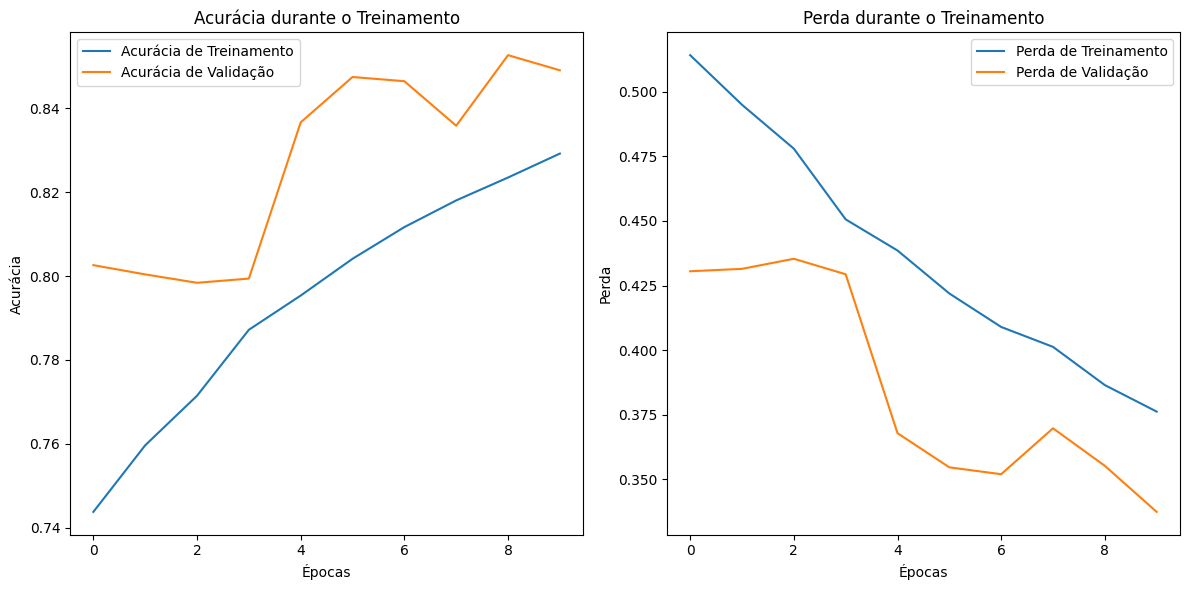

In [ ]:
plt.figure(figsize=(12, 6))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

Gráfico de Acurácia:

O gráfico da acurácia mostrará duas curvas:
Acurácia de Treinamento: Como a acurácia do modelo melhorou durante o treinamento.
Acurácia de Validação: Como a acurácia foi no conjunto de validação.
Espera-se que a acurácia de treinamento aumente ao longo das épocas, e a acurácia de validação pode ter um padrão semelhante, mas com uma tendência de estabilização após um certo ponto.
Gráfico de Perda:

O gráfico da perda mostrará duas curvas:
Perda de Treinamento: Como a função de perda diminuiu ao longo do treinamento.
Perda de Validação: Como a função de perda foi no conjunto de validação.
Espera-se que a perda de treinamento diminua, enquanto a perda de validação pode diminuir mais lentamente ou estabilizar se o modelo começar a overfit (ajustando-se muito aos dados de treinamento).

In [ ]:
# Avaliar o modelo no conjunto de validação
test_loss, test_accuracy = modelo.evaluate(validacao)
print(f"Perda no Teste: {test_loss}")
print(f"Acurácia no Teste: {test_accuracy}")

131/156 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8553 - loss: 0.3312

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.8541 - loss: 0.3326
Perda no Teste: 0.33740705251693726
Acurácia no Teste: 0.8490982055664062


modelo.evaluate(validacao):

O método evaluate() calcula a perda e a acurácia do modelo com base nos dados fornecidos (validacao, que é o gerador de dados de validação).
O método retorna a perda e acurácia do modelo no conjunto de validação, o que é útil para verificar a performance do modelo em dados que ele não viu durante o treinamento.
test_loss, test_accuracy:

test_loss: A perda do modelo no conjunto de validação.
test_accuracy: A acurácia do modelo no conjunto de validação.
Exibição dos Resultados:

A perda (test_loss) e a acurácia (test_accuracy) são exibidas no console com a ajuda do print.

In [ ]:
modelo.save('modelo_cachorro_gato.h5')


Salvando o modelo

Resumo Geral

Organização dos Dados: Criamos um DataFrame com os caminhos das imagens e rótulos.
Divisão dos Dados: Dividimos os dados em treinamento e validação usando train_test_split.
Processamento de Imagens: Usamos ImageDataGenerator para aumentar as imagens de treinamento e normalizar as de validação.
Criação do Modelo: Construímos uma CNN com camadas convolucionais, de pooling e densas.
Treinamento e Avaliação: Compilamos, treinamos e avaliamos o modelo usando os conjuntos de dados de treinamento e validação.
Visualização: Geramos gráficos de acurácia e perda para monitorar o desempenho durante o treinamento.